- We'll create 7 new features

1. q1_len => Char length of q1
2. q2_len => Char length of q2
3. q1_words => Num of words in q1
4. q2_words => Num of words in q2
5. common_words => Number of words in both questions that are the same (case insensitive)
6. word_total => Total words in q1 and q2
7. word_share => Word_common / word_total


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./Dataset/train.csv")
df.shape

(404290, 6)

In [15]:
new_df = df.sample(30000, random_state=2)

In [16]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 398782 to 312470
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [18]:
new_df.duplicated().sum()

0

is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

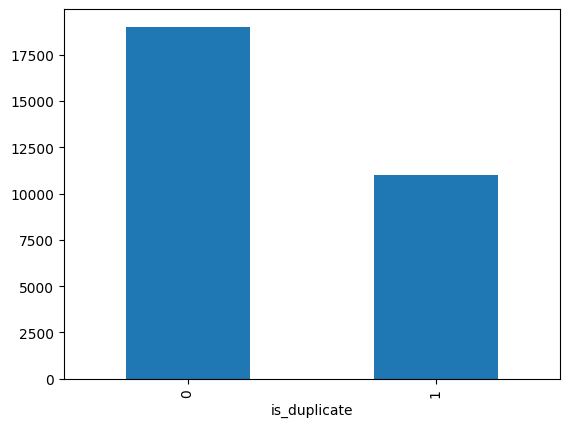

In [20]:
# Distribution of duplicate and non-nonduplicate question

print(new_df["is_duplicate"].value_counts())
print((new_df["is_duplicate"].value_counts() /
      new_df["is_duplicate"].count()) * 100)
new_df["is_duplicate"].value_counts().plot(kind="bar")

In [23]:
# Repeated Questions

qid = pd.Series(new_df["qid1"].tolist() + new_df["qid2"].tolist())
print("Number of unique questions", np.unique(
    qid).shape[0])  # This Questions are unique

x = qid.value_counts() > 1
# This questions are multiple times
print("Number of repeated questions", x[x].shape[0])

Number of unique questions 55299
Number of repeated questions 3480


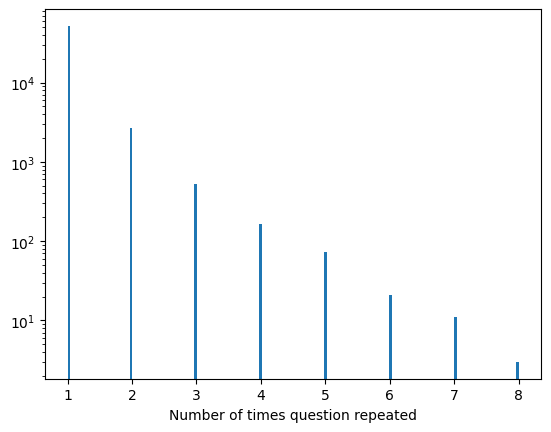

In [24]:
# Repeated questions histogram

plt.hist(qid.value_counts().values, bins=160)
plt.yscale("log")
plt.xlabel("Number of times question repeated")
plt.show()

Feature Engineering


In [25]:
new_df["q1_len"] = new_df["question1"].str.len()
new_df["q2_len"] = new_df["question2"].str.len()

In [27]:
new_df["q1_num_words"] = new_df["question1"].apply(
    lambda row: len(row.split(" ")))
new_df["q2_num_words"] = new_df["question2"].apply(
    lambda row: len(row.split(" ")))

In [28]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [30]:
# print(list(map(lambda word: word.lower().strip(),
#                "I am poor but I want to invest".split(" "))))
# print(set(map(lambda word: word.lower().strip(),
#               "I am poor but I want to invest".split(" "))))

['i', 'am', 'poor', 'but', 'i', 'want', 'to', 'invest']
{'poor', 'am', 'invest', 'but', 'to', 'i', 'want'}


In [31]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(),
             row["question1"].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),
                 row["question2"].split(" ")))
    return len(w1 & w2)

In [32]:
new_df["common_words"] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [36]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(),
             row["question1"].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),
                 row["question2"].split(" ")))
    return (len(w1) + len(w2))

In [37]:
new_df["total_words"] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [56]:
new_df["word_share"] = round(new_df["common_words"] / new_df["total_words"], 2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


New feature analysis


Minimum characters 2
Maximum characters 391
Mean characters per question: 59.71


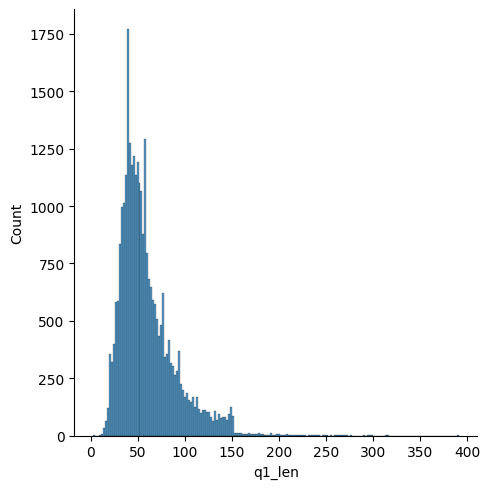

In [39]:
sns.displot(new_df["q1_len"])
print("Minimum characters", new_df["q1_len"].min())
print("Maximum characters", new_df["q1_len"].max())
print("Mean characters per question:", round((new_df['q1_len'].mean()), 2))

Minimum characters 6
Maximum characters 1151
Mean characters per question: 60.29


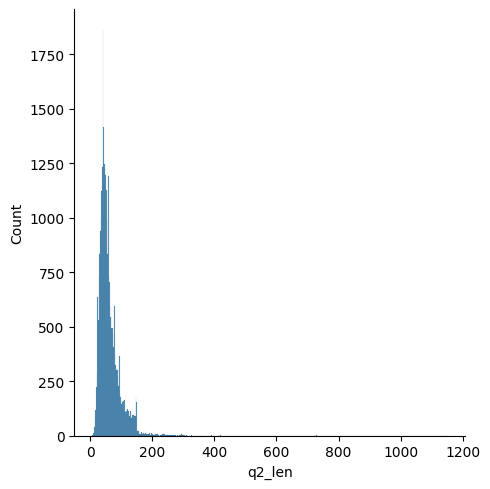

In [40]:
sns.displot(new_df["q2_len"])
print("Minimum characters", new_df["q2_len"].min())
print("Maximum characters", new_df["q2_len"].max())
print("Mean characters per question:", round((new_df['q2_len'].mean()), 2))

Minimum characters 1
Maximum characters 72
Mean characters per question: 10.97


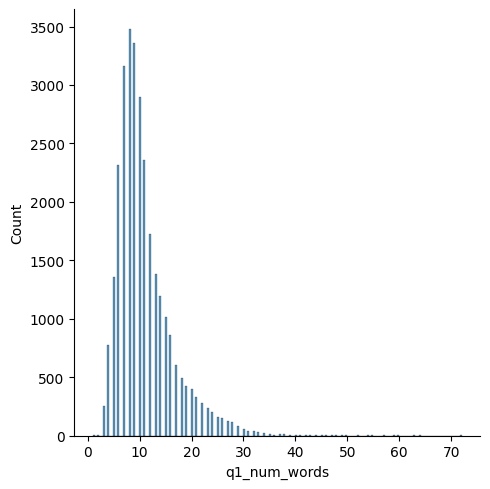

In [41]:
sns.displot(new_df["q1_num_words"])
print("Minimum characters", new_df["q1_num_words"].min())
print("Maximum characters", new_df["q1_num_words"].max())
print("Mean characters per question:", round(
    (new_df['q1_num_words'].mean()), 2))

Minimum characters 1
Maximum characters 237
Mean characters per question: 11.23


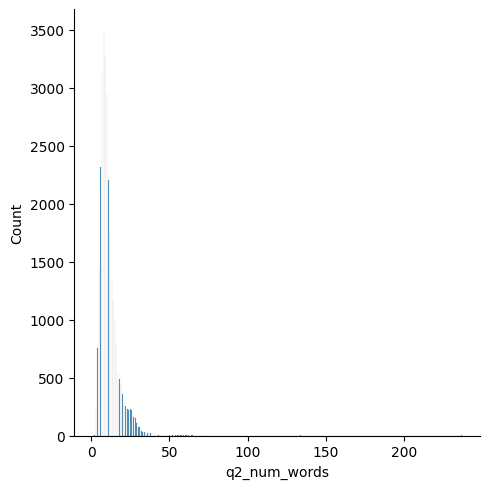

In [42]:
sns.displot(new_df["q2_num_words"])
print("Minimum characters", new_df["q2_num_words"].min())
print("Maximum characters", new_df["q2_num_words"].max())
print("Mean characters per question:", round(
    (new_df['q2_num_words'].mean()), 2))

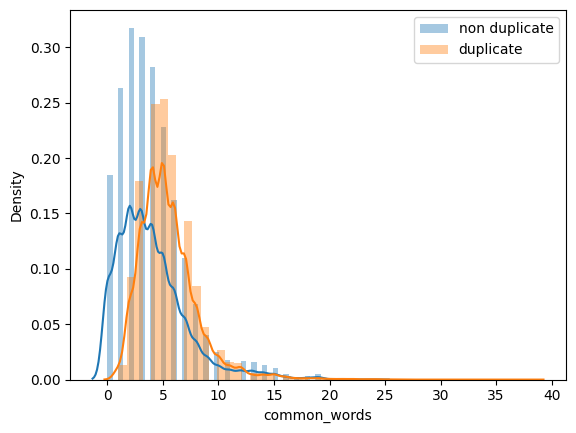

In [46]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]
             ['common_words'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]
             ['common_words'], label='duplicate')
plt.legend()
plt.show()

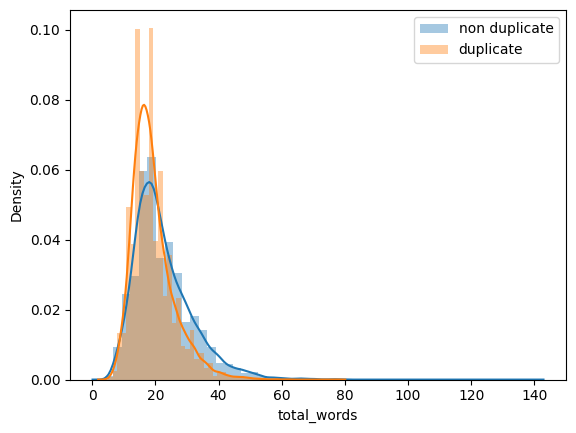

In [48]:
sns.distplot(new_df[new_df["is_duplicate"] == 0]
             ["total_words"], label="non duplicate")
sns.distplot(new_df[new_df["is_duplicate"] == 1]
             ["total_words"], label="duplicate")
plt.legend()
plt.show()

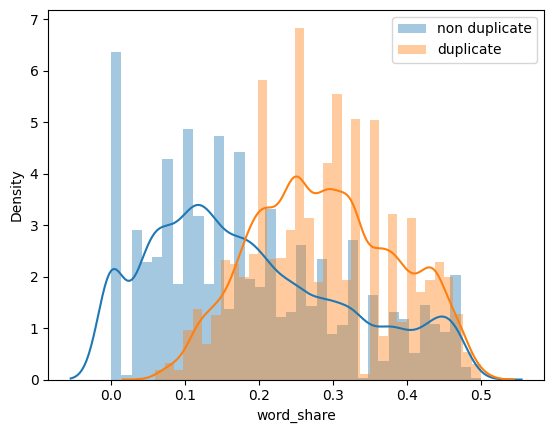

In [57]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]
             ['word_share'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]
             ['word_share'], label='duplicate')
plt.legend()
plt.show()

In [58]:
ques_df = new_df[["question1", "question2"]]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [59]:
final_df = new_df.drop(
    columns=["id", "qid1", "qid2", "question1", "question2"])
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df["question1"]) + list(ques_df["question2"])

cv = CountVectorizer(max_features=3000)
q1_array, q2_array = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [63]:
q1_df = pd.DataFrame(q1_array, index=ques_df.index)
q2_df = pd.DataFrame(q2_array, index=ques_df.index)

temp_df = pd.concat([q1_df, q2_df], axis=1)
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
temp_df.shape

(30000, 6000)

In [65]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    final_df.iloc[:, 1:].values, final_df.iloc[:, 0].values, test_size=0.2, random_state=1)

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.772


In [69]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.7645
